In [14]:
import math
import os
import sys
import argparse

import pandas as pd
import numpy as np

sys.path.append('..')

from src.IO.IO import IO
from src.util import get_config

%matplotlib inline
import matplotlib.pyplot as plt
from src.prg.prg.prg import create_prg_curve, plot_prg, calc_auprg, plot_pr
plt.rcParams['figure.figsize'] = (6,5)

In [15]:
# absolute path to the config folder
path = "../src/config_files/"
cfg_filename = "config_lbds.yaml"
fn = path + '/' + cfg_filename
if os.path.exists(fn):
    cfg = get_config(fn)
else:
    print("Config file {} couldn't be found at {}, exiting".format(args.configfn, fn))
    exit()

Reading config file


In [16]:
io = IO(cfg, 'pipeline')
ad = cfg["pipeline"]["anomaly_detection"]["anomaly_detector"]

fn = "grid_search_LBDS_B2_iforest_auc_res-best.csv"
#fn = "grid_search_LBDS_B2_iforest_auc_res-best_SHAP.csv"
fn = "LBDS_pipeline_2016_B2_gmm_e526ed11-1921-4bbd-8fc5-1f97a73f47db.csv"
fn = "LBDS_pipeline_2016_B2_gmm_b13ca1b7-5b1b-4087-92e6-754ff880f898.csv"
#f_path = io.get_grid_search_output_path(ad)
f_path = io.get_pipeline_output_path(ad)
preds_and_truth_df = io.read_csv(fn, f_path)

Reading LBDS_pipeline_2016_B2_gmm_b13ca1b7-5b1b-4087-92e6-754ff880f898.csv file


In [17]:
preds_and_truth_df = preds_and_truth_df.sort_values(by="y_pred", ascending=False)
labels = np.array(preds_and_truth_df["y_true"], dtype='int')
scores = np.array(preds_and_truth_df["y_pred"])

In [18]:
print(list(labels))
print(scores)

[0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 

In [19]:
prg_curve = create_prg_curve(labels, scores)

In [20]:
auprg = calc_auprg(prg_curve)
print("AUPRG =", auprg)

AUPRG = 0.9705728650075629


In [21]:
#pd.DataFrame(prg_curve)

/home/thomas/Documents/git/anomaly-detection-abt-equipment/notebooks/../src/prg/prg/prg.py:271: RuntimeWarning: invalid value encountered in double_scalars
  return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])


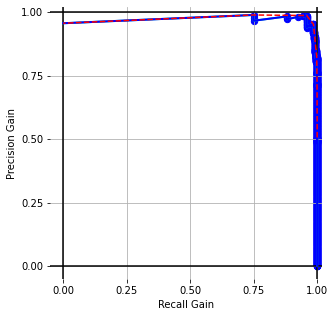

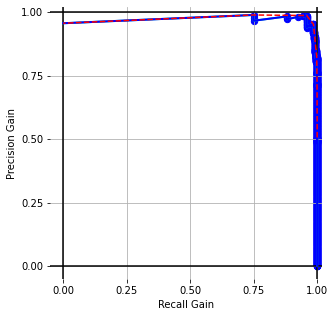

In [22]:
plot_prg(prg_curve)

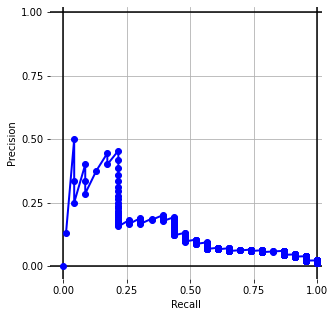

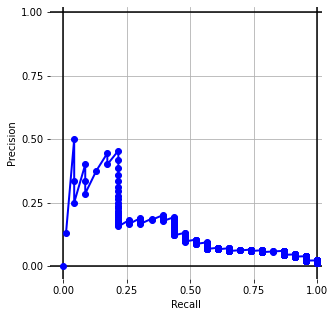

In [23]:
plot_pr(prg_curve)